In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [58]:
sample_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")
test_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
train_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# **Preliminary Data Exploration**

In [60]:
print(train_df.shape)
print(test_df.shape)

(20000, 22)
(5000, 21)


In [61]:
train_df.head(5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [62]:
test_df.head(5)

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [63]:
sample_df.head(5)

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN


In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

In [66]:
print(train_df.isnull().sum())

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64


**Train dataset**
* Cross_Street has 16552 missing values.
* Modus_Operandi has 2741 missing values.
* Victim_Sex & Victim_Descent columns each has 2624 missing values.
* Weapon_Used_Code & Weapon_Description each has 12665 missing values.
# We could either fill these missing values or remove them.





In [67]:
print(test_df.isnull().sum())

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64


**Test dataset**
* Cross_Street has 4190 missing values.
* Modus_Operandi has 684 missing values.
* Victim_Sex & Victim_Descent columns each has 643 missing values.
* Weapon_Used_Code & Weapon_Description each has 3153 missing values.
# We could either fill these missing values or remove them.



In [68]:
train_df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,20000,12399,6TH,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cross_Street,3448,1495,BROADWAY,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,20000.0,NaN,NaN,NaN,33.940704,2.12681,0.0,34.0092,34.0587,34.165025,34.3281
Longitude,20000.0,NaN,NaN,NaN,-117.893072,7.377726,-118.6634,-118.4297,-118.323,-118.2744,0.0
Date_Reported,20000,811,07/13/2020 12:00:00 AM,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_Occurred,20000,366,01/01/2020 12:00:00 AM,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Occurred,20000.0,NaN,NaN,NaN,1352.38035,646.100291,1.0,930.0,1430.0,1900.0,2359.0
Area_ID,20000.0,NaN,NaN,NaN,10.83425,6.033166,1.0,6.0,11.0,16.0,21.0
Area_Name,20000,21,77th Street,1345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reporting_District_no,20000.0,NaN,NaN,NaN,1129.5992,603.330519,101.0,632.0,1162.0,1622.0,2197.0


In [69]:
test_df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,5000,4165,7TH ST,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cross_Street,810,547,FIGUEROA ST,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,5000.0,NaN,NaN,NaN,33.957169,1.986742,0.0,34.0108,34.058,34.16225,34.3275
Longitude,5000.0,NaN,NaN,NaN,-117.952663,6.890957,-118.6503,-118.4312,-118.3232,-118.2746,0.0
Date_Reported,5000,514,06/19/2020 12:00:00 AM,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_Occurred,5000,366,01/01/2020 12:00:00 AM,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Occurred,5000.0,NaN,NaN,NaN,1337.7374,663.922202,1.0,900.0,1430.0,1900.0,2359.0
Area_ID,5000.0,NaN,NaN,NaN,10.7366,6.051524,1.0,6.0,11.0,16.0,21.0
Area_Name,5000,21,77th Street,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reporting_District_no,5000.0,NaN,NaN,NaN,1119.8798,605.143645,101.0,628.0,1138.0,1622.25,2197.0


**1. Both the datasets have similar Area name which has more crimes.**

**2. Crime Category which is the target variable has most cases of Property crimes.**


# **Visualizing the Data**

# **1. Visualizing the Victim age and Gender**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


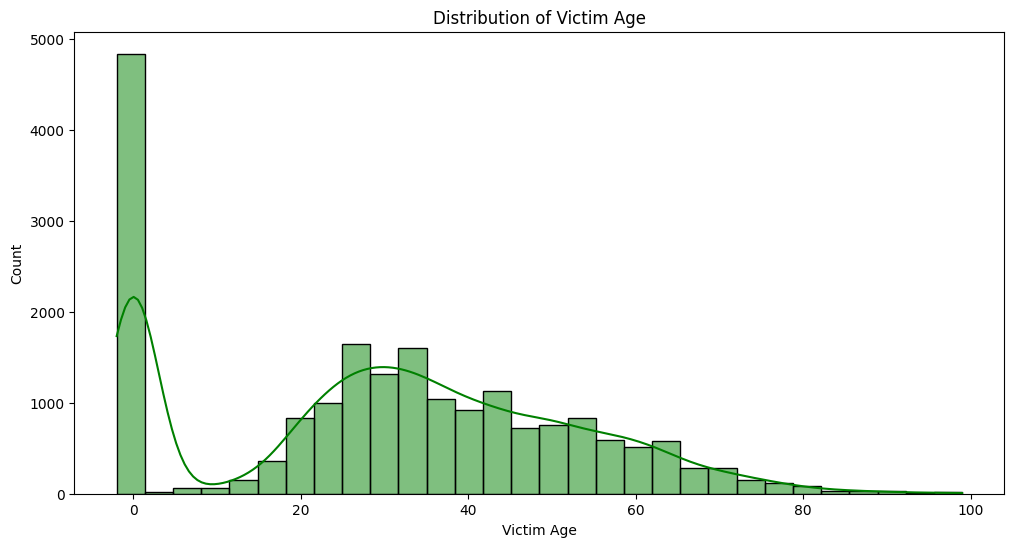

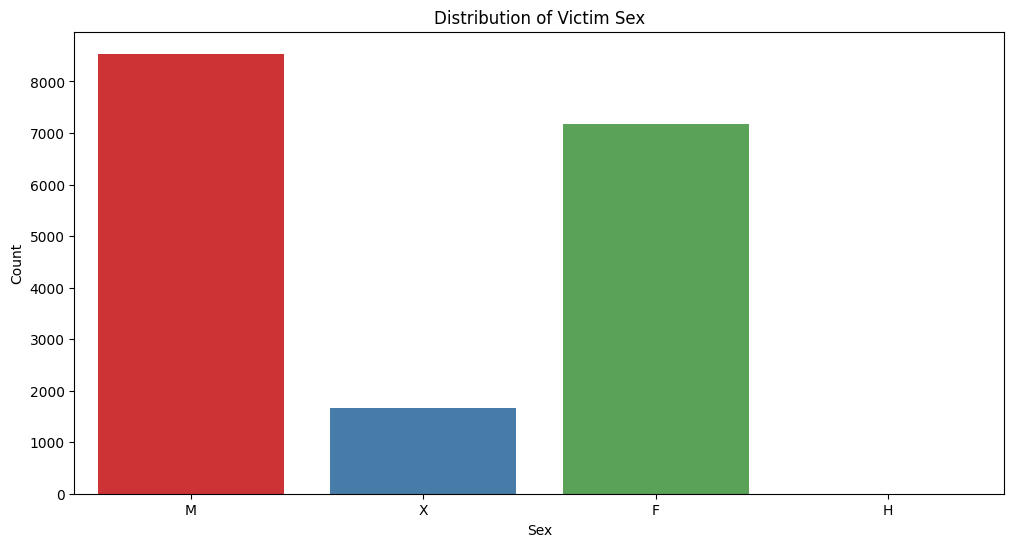

In [70]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Victim_Age'], bins=30, kde=True, color='green')
plt.title('Distribution of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Victim_Sex', data=train_df, palette='Set1')
plt.title('Distribution of Victim Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# * Victim age shows a right-skewed distribution, with most victims age is between 20-50
# * More male victims are reported compared to female victims.

# **2. Visualizing the Time Occurred**

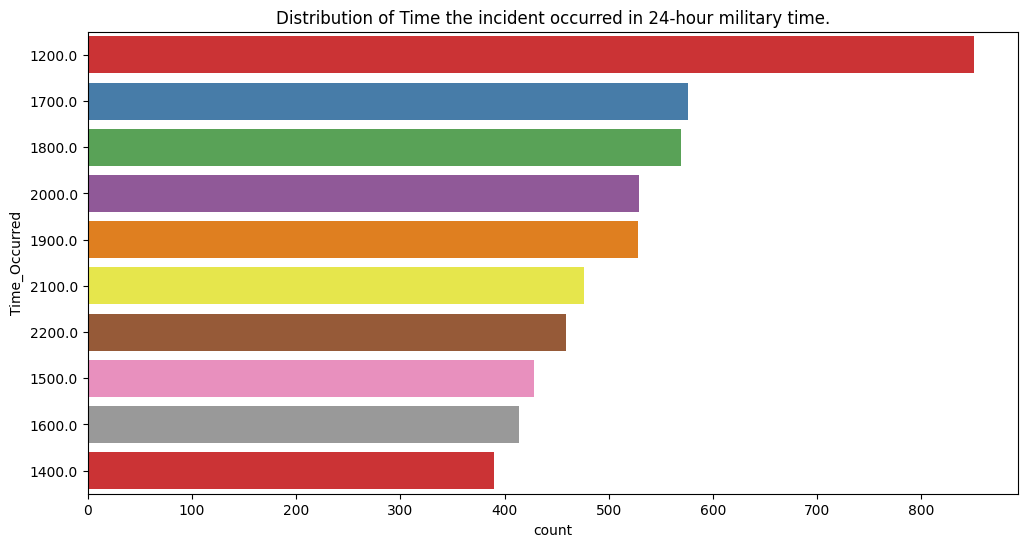

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Time_Occurred', data=train_df, order=train_df['Time_Occurred'].value_counts().index[:10], palette='Set1')
plt.title('Distribution of Time the incident occurred in 24-hour military time.')
plt.show()

#  Most of the incident occurred in 1200 military time i.e 12 pm followed by 1700(5 pm) and 1800 (6 pm). 

# **3. Visualizing the Target Variable**

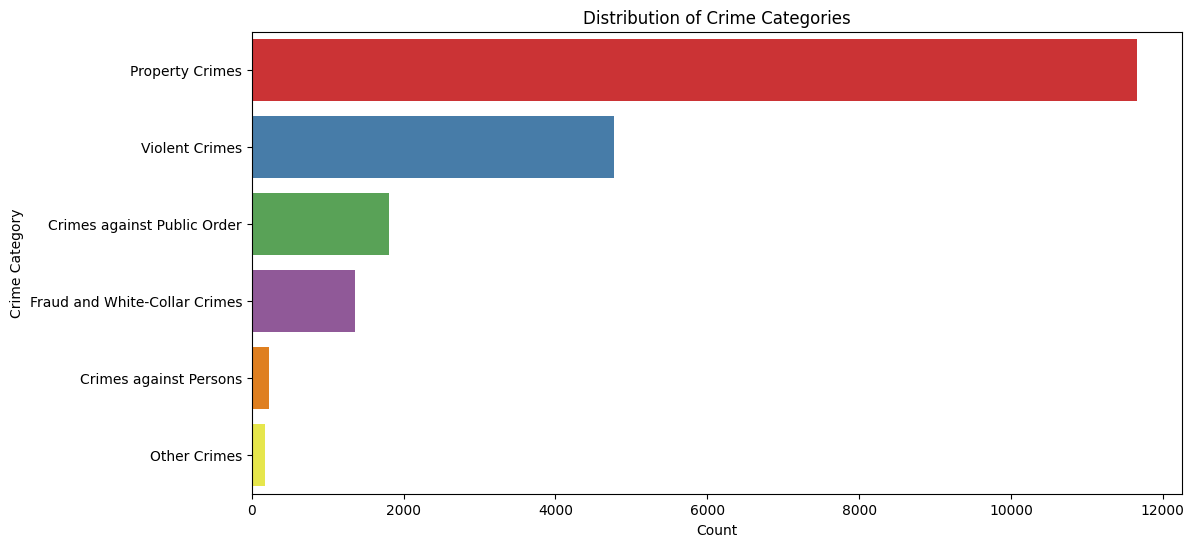

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Crime_Category', data= train_df, order=train_df['Crime_Category'].value_counts().index, palette='Set1')
plt.title('Distribution of Crime Categories')
plt.xlabel('Count')
plt.ylabel('Crime Category')
plt.show()

# Data Cleaning and Preprocessing

***Filling the missing values***

In [73]:
train_df.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

In [74]:
# Fill NaN values in train dataset with unknown and filling numerical variable with median value

train_df['Cross_Street'] = train_df['Cross_Street'].fillna('Unknown')
train_df['Modus_Operandi'] = train_df['Modus_Operandi'].fillna('Unknown')
train_df['Victim_Sex'] = train_df['Victim_Sex'].fillna('Unknown')
train_df['Victim_Descent'] = train_df['Victim_Descent'].fillna('Unknown')
train_df['Premise_Description'] = train_df['Premise_Description'].fillna('Unknown')
train_df['Weapon_Description'] = train_df['Weapon_Description'].fillna('Unknown')
train_df['Weapon_Used_Code'] = train_df['Weapon_Used_Code'].fillna(train_df['Weapon_Used_Code'].median())

# Fill NaN values in test dataset with unknown and filling numerical variable with median value
test_df['Cross_Street'] = test_df['Cross_Street'].fillna('Unknown')
test_df['Modus_Operandi'] = test_df['Modus_Operandi'].fillna('Unknown')
test_df['Victim_Sex'] = test_df['Victim_Sex'].fillna('Unknown')
test_df['Victim_Descent'] = test_df['Victim_Descent'].fillna('Unknown')
test_df['Premise_Description'] = test_df['Premise_Description'].fillna('Unknown')
test_df['Weapon_Description'] = test_df['Weapon_Description'].fillna('Unknown')
test_df['Weapon_Used_Code'] = test_df['Weapon_Used_Code'].fillna(test_df['Weapon_Used_Code'].median())


# **Scaling & Encoding the train data**

In [75]:
# Encode categorical features

label_encoders = {}
categorical_columns = ['Location', 'Cross_Street', 'Area_Name', 'Modus_Operandi',
                           'Victim_Sex', 'Victim_Descent', 'Premise_Description',
                           'Weapon_Description', 'Status', 'Status_Description']


for col in categorical_columns:
    LE = LabelEncoder()
    train_df[col] = LE.fit_transform(train_df[col])

    # handle unseen labels in test data
    test_df[col] = test_df[col].map(lambda s: '<unknown>' if s not in LE.classes_ else s)
    LE.classes_ = np.append(LE.classes_, '<unknown>')
    test_df[col] = LE.transform(test_df[col])

    # store the label encoder
    label_encoders[col] = LE

In [76]:
# encode the target variable 'Crime_Category'
labelE_crime_category = LabelEncoder()
train_df['Crime_Category'] = labelE_crime_category.fit_transform(train_df['Crime_Category'])


In [77]:
scaler = StandardScaler()
numerical_columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
                     'Reporting_District_no', 'Part 1-2', 'Victim_Age',
                     'Premise_Code', 'Weapon_Used_Code']

train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

In [78]:
train_df['Crime_Category'].unique() 

array([4, 5, 3, 1, 2, 0])

#  Model Building

In [79]:
# define features and target variable for training data
X = train_df.drop(columns=['Crime_Category', 'Date_Reported', 'Date_Occurred'])
Y = train_df['Crime_Category']

# prepare test data
X_test = test_df.drop(columns=['Date_Reported', 'Date_Occurred'])

# split the training data into training and test sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(16000, 19) (4000, 19) (16000,) (4000,)


In [80]:
print(X_test.shape)

(5000, 19)


# **1. KNN algorithm**

In [81]:
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
 ])

knn_param_grid = {
    'knn__n_neighbors': [6],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2, 3]
 }



In [82]:
knn_grid_search = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

print("Best hyperparameters for KNN:", knn_grid_search.best_params_)

Best hyperparameters for KNN: {'knn__algorithm': 'auto', 'knn__n_neighbors': 6, 'knn__p': 1, 'knn__weights': 'distance'}


In [83]:
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
y_pred_labels_knn = labelE_crime_category.inverse_transform(y_pred_knn)

In [84]:
y_val_pred = best_knn_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.769

In [85]:
# submission = pd.DataFrame({
#     'ID': test_df.index + 1,
#     'Crime_Category': y_pred_labels_knn
# })
# submission.to_csv('/kaggle/working/submission.csv', index=False)

# **2. SVM algorithm**

In [86]:
# svm_pipeline = Pipeline([
#      ('svm', SVC())
#  ])

# svm_param_grid = {
#      'svm__C': [0.1, 1, 10],
#      'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#      'svm__gamma' : ['scale', 'auto']
#  }


In [87]:
# svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# svm_grid_search.fit(X_train, y_train)

# print("Best hyperparameters for SVM:", svm_grid_search.best_params_)

In [88]:
# best_svm_model = svm_grid_search.best_estimator_
# y_pred_svm = best_svm_model.predict(X_test)
# y_pred_labels_svm = labelE_crime_category.inverse_transform(y_pred_svm)


In [89]:
# submission = pd.DataFrame({
#     'ID': test_df.index + 1,
#     'Crime_Category': y_pred_labels_svm
# })
# submission.to_csv('/kaggle/working/submission.csv', index=False)

# **3.Decision Tree  algorithm**

In [90]:
cart_pipeline = Pipeline([
    ('cart', DecisionTreeClassifier())   #Decision Trees model
 ])

 # Hyperparameter tuning using GridSearchCV for CART
cart_param_grid = {
    'cart__max_depth': [None, 5, 10],      #Maximum depth of the tree
    'cart__min_samples_split': [2, 5, 10], #Minimum number of samples required to split a node
    'cart__min_samples_leaf': [1, 2, 4]   #Minimum number of samples required at each leaf node
 }


In [91]:
cart_grid_search = GridSearchCV(cart_pipeline, cart_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cart_grid_search.fit(X_train, y_train)

# Best hyperparameters for CART
print("Best hyperparameters for CART:", cart_grid_search.best_params_)


Best hyperparameters for CART: {'cart__max_depth': 10, 'cart__min_samples_leaf': 4, 'cart__min_samples_split': 10}


In [92]:
#Evaluate CART model
best_cart_model = cart_grid_search.best_estimator_
y_pred_cart = best_cart_model.predict(X_test)
y_pred_labels_cart = labelE_crime_category.inverse_transform(y_pred_cart)

In [93]:
y_val_pred = best_cart_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.88725

In [94]:
# submission = pd.DataFrame({
#     'ID': test_df.index + 1,
#     'Crime_Category': y_val_pred
# })
# submission.to_csv('/kaggle/working/submission.csv', index=False)

# **4. Bagging algorithm**

In [95]:
bagging_pipeline = Pipeline([
    ('bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier()))   #Random Forest model
 ])

#Hyperparameter tuning using GridSearchCV for Bagging
bagging_param_grid = {
    'bagging__n_estimators': [50, 100],   #Number of base estimators
    'bagging__max_samples': [0.5, 0.8],   #Number of samples to draw from X to train each base estimator
    'bagging__max_features': [0.5, 0.8]   #Number of features to draw from X to train each base estimator
 }


In [96]:
bagging_grid_search = GridSearchCV(bagging_pipeline, bagging_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
bagging_grid_search.fit(X_train, y_train)

#Best hyperparameters for Bagging
print("Best hyperparameters for Bagging:", bagging_grid_search.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

Best hyperparameters for Bagging: {'bagging__max_features': 0.8, 'bagging__max_samples': 0.8, 'bagging__n_estimators': 100}


In [97]:
#Evaluate Bagging model
best_bagging_model = bagging_grid_search.best_estimator_
y_pred_bagging = best_bagging_model.predict(X_test)


In [98]:
y_pred_bagging_labels = labelE_crime_category.inverse_transform(y_pred_bagging)

In [99]:
y_val_pred = best_bagging_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.921

In [100]:
# submission = pd.DataFrame({'ID': range(1, len(test_df) + 1),
#                            'Crime_Category': y_pred_bagging_labels })

# submission.to_csv('/kaggle/working/submission.csv', index=False)

# **5. Boosting algorithm**

In [101]:
boosting_pipeline = Pipeline([
    ('boosting', GradientBoostingClassifier())   #Gradient Boosting model
 ])

#Hyperparameter tuning using GridSearchCV for Boosting
boosting_param_grid = {
   'boosting__n_estimators': [50, 100],   #Number of boosting stages
    'boosting__learning_rate': [0.01, 0.1, 0.5]  # Learning rate shrinks the contribution of each tree
 }


In [102]:
boosting_grid_search = GridSearchCV(boosting_pipeline, boosting_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
boosting_grid_search.fit(X_train, y_train)

#Best hyperparameters for Boosting
print("Best hyperparameters for Boosting:", boosting_grid_search.best_params_)

Best hyperparameters for Boosting: {'boosting__learning_rate': 0.1, 'boosting__n_estimators': 100}


In [103]:
#Evaluate Boosting model
best_boosting_model = boosting_grid_search.best_estimator_
y_pred_boosting = best_boosting_model.predict(X_test)

In [104]:
y_pred_boosting_labels = labelE_crime_category.inverse_transform(y_pred_boosting)

In [105]:
y_val_pred = best_boosting_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.917

In [106]:
submission = pd.DataFrame({'ID': range(1, len(test_df) + 1),
                           'Crime_Category': y_pred_boosting_labels })

submission.to_csv('/kaggle/working/submission.csv', index=False)

# **6. Multi Layer Perceptron algorithm**

In [107]:
mlp_pipeline = Pipeline([
    ('mlp', MLPClassifier())
 ])


mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(64, 64), (64), (128), (128, 64), (28, 28)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.001, 0.01]  ,
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],

 }

mlp_grid_search = GridSearchCV(mlp_pipeline, mlp_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

print("Best hyperparameters for MLP:", mlp_grid_search.best_params_)


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of i

Best hyperparameters for MLP: {'mlp__activation': 'relu', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (128, 64), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}


In [108]:
best_mlp_model = mlp_grid_search.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)


In [109]:
y_pred_mlp = best_mlp_model.predict(X_test)
y_pred_labels_mlp = labelE_crime_category.inverse_transform(y_pred_mlp)

In [110]:
y_val_pred = best_mlp_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
accuracy

0.6585

# **Comparison of built models**

In [111]:
# ,best_svm_model , 'SVM'

In [112]:
models = [best_knn_model,best_cart_model, best_bagging_model, best_boosting_model, best_mlp_model]
model_names = ['KNN', 'Decision Tree', 'Bagging','Boosting','MLP']

performance_data = []

for i, model in enumerate(models):
    predictions = model.predict(X_val)
    performance_data.append({
        'Model': model_names[i],
        'Accuracy': accuracy_score(y_val, predictions),
        'Precision': precision_score(y_val, predictions, average='weighted'),
        'Recall': recall_score(y_val, predictions, average='weighted'),
        'F1 Score': f1_score(y_val, predictions, average='weighted')
    })

performance_df = pd.DataFrame(performance_data)

performance_df.set_index('Model', inplace=True)

print(performance_df)

               Accuracy  Precision   Recall  F1 Score
Model                                                
KNN             0.76900   0.750084  0.76900  0.756844
Decision Tree   0.88725   0.884796  0.88725  0.884498
Bagging         0.92100   0.919275  0.92100  0.917076
Boosting        0.91700   0.914647  0.91700  0.914981
MLP             0.65850   0.720940  0.65850  0.673744


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Insight:
* Bagging with the highest accuracy of 0.92175.
* For Precision Bagging and boosting are the top performers.
* Bagging has the highest F1 score.

**Bagging is found to be the best performing model for this dataset among all as it is giving the    highest accuracy.**

# Confusion Matrix of all models

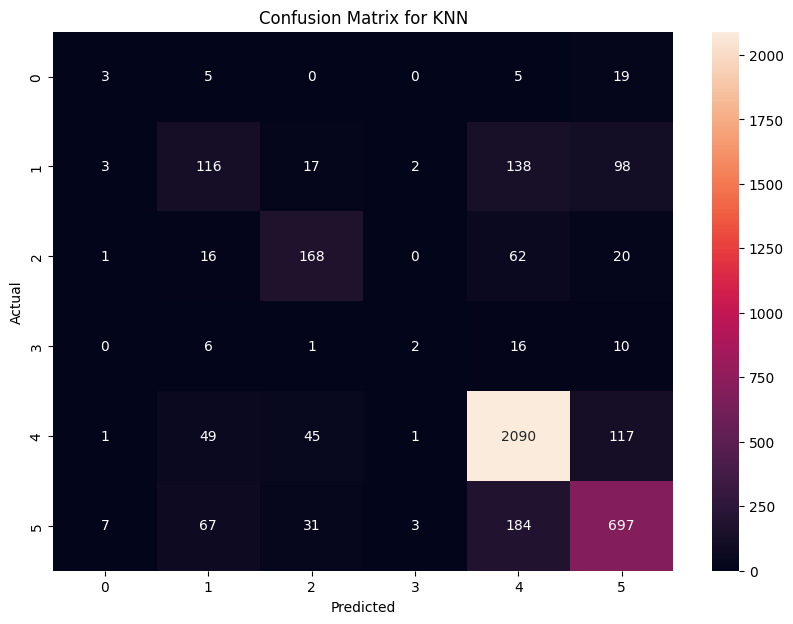

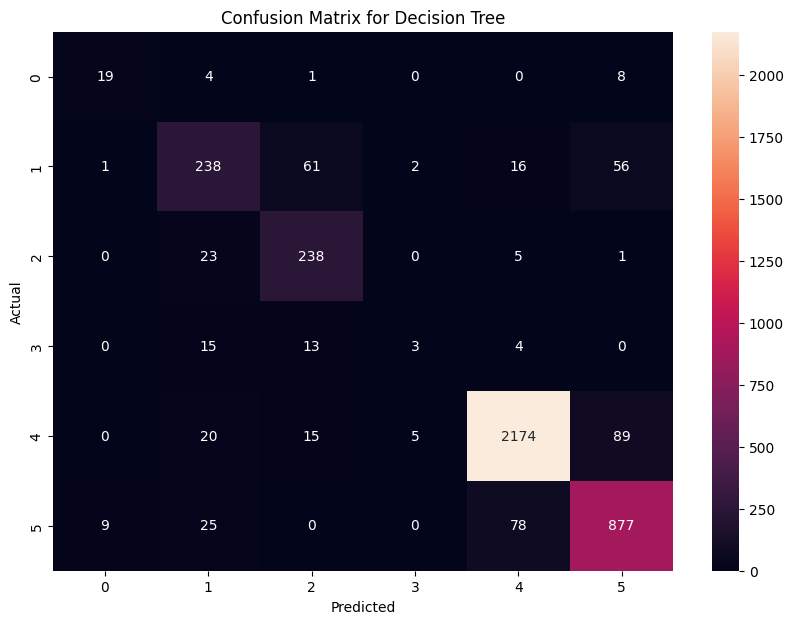

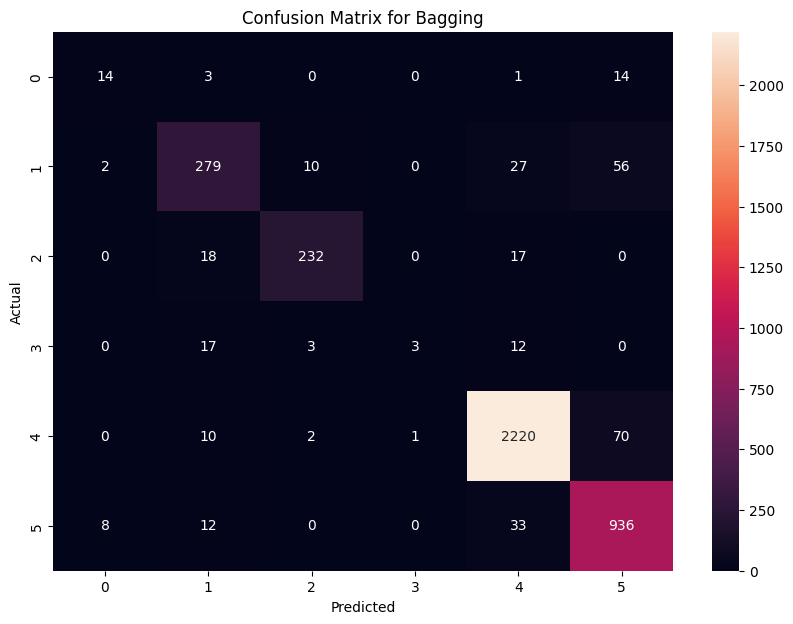

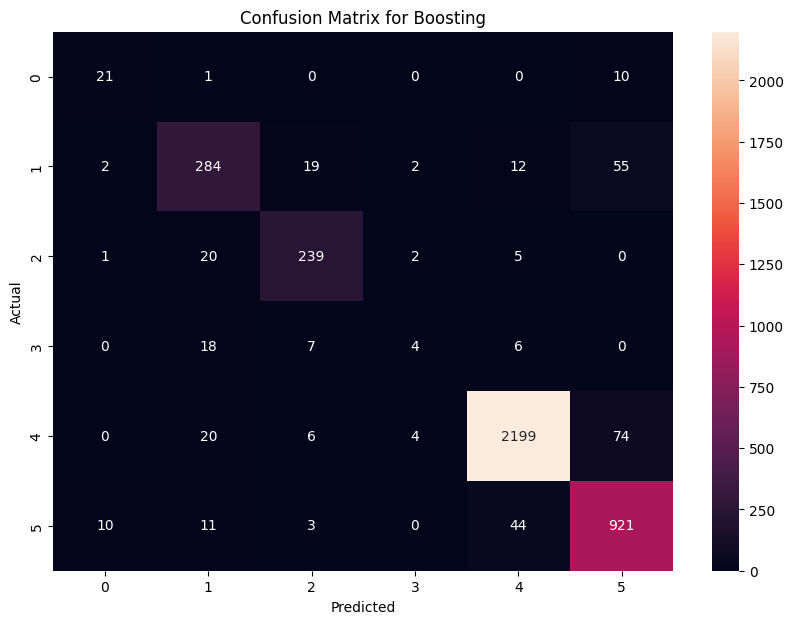

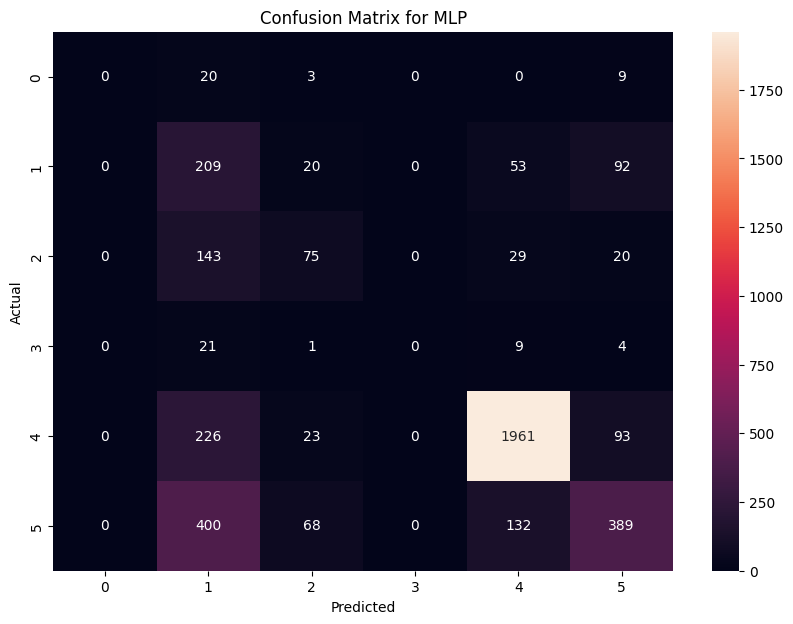

In [113]:
for i, model in enumerate(models):
    predictions = model.predict(X_val)
    cm = confusion_matrix(y_val, predictions)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix for {model_names[i]}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()